# Face-Recognizer
A facial recognition system is a technology capable of matching a human face from a digital image or a video frame against a database of faces. Such a system is typically employed to authenticate users through ID verification services and works by pinpointing and measuring facial features from a given image.

## Import libraries

In [2]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

## Load Neural Net models

In [3]:
detector = cv2.FaceDetectorYN.create(
    "model/face/face_detection_yunet_2022mar.onnx",
    "",
    (320, 320),
    0.9,
    0.3,
    5000
)

recognizer = cv2.FaceRecognizerSF.create(
"model/face/face_recognition_sface_2021dec.onnx","")

(-0.5, 97.5, 130.5, -0.5)

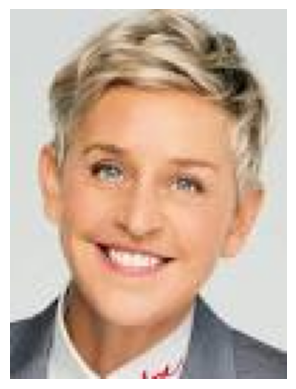

In [4]:
pattern_path = './Images/ellen.jpeg' ## Path to image

pattern_image = cv2.imread(pattern_path)

plt.imshow(pattern_image[...,::-1]); plt.axis('off')

In [5]:
## Draw face areas in picture 
def visualize(input, face, thickness=2, color=(0, 0, 255)):
    coords = face[:-1].astype(np.int32)
    cv2.rectangle(input, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), color, thickness)

(-0.5, 111.5, 111.5, -0.5)

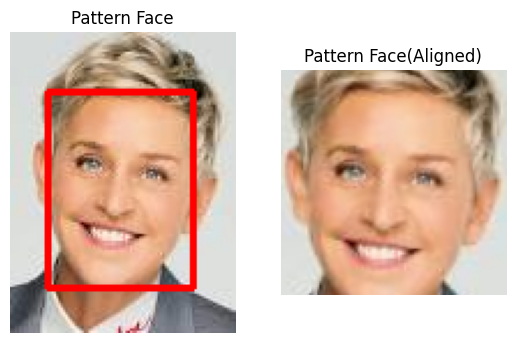

In [6]:
img1 = pattern_image.copy()

img1Width = int(img1.shape[1])
img1Height = int(img1.shape[0])

detector.setInputSize((img1Width, img1Height))

faces1 = detector.detect(img1)

assert faces1[1] is not None, 'Cannot find a face in {}'.format(image1)

pattern_face = faces1[1][0] ## select first face for pattern 
# Draw results on the input image
pattern_face_align = recognizer.alignCrop(img1, pattern_face)
visualize(img1, pattern_face)

# Save results if save is true
plt.figure()
plt.subplot(121);plt.imshow(img1[...,::-1]);plt.title("Pattern Face");plt.axis('off')
plt.subplot(122);plt.imshow(pattern_face_align[...,::-1]);plt.title("Pattern Face(Aligned)");plt.axis('off')


In [8]:
pattern_feature = recognizer.feature(pattern_face_align)
l2_similarity_threshold = 1.128


video_path = 'Videos/Ellen DeGeneres takes a selfie at the Oscars [GsSWj51uGnI].mp4'
# video_path = 0 For Webcam 

cap = cv2.VideoCapture(video_path)
width = int(cap.get(3))
height = int(cap.get(4))
detector.setInputSize((width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        print("Exiting ...")
        break
    
    faces2 = detector.detect(frame)
    if faces2[1] is not None:
        for face in faces2[1]:
            aligned_face = recognizer.alignCrop(frame, face)
            face_feature = recognizer.feature(aligned_face)
            l2_score = recognizer.match(pattern_feature, face_feature, cv2.FaceRecognizerSF_FR_NORM_L2)
            if l2_score <= l2_similarity_threshold:  
                visualize(frame, face, 2, (255, 255, 0))
            else: 
                visualize(frame, face, 2, (0, 0, 255))
            
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) & 0xFF == 27: ## press esc to quit. 
        break

cap.release()
cv2.destroyAllWindows()
